# **MÓDULO 39 - Exercicio - Aplicando SVM**

Nessa atividade vocês usarão uma base já connhecida, a base de propensão a compra de carros. A mesma que também usamos na tarefa de XGboost!


In [1]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Carrega a base de dados, verifique os tipos de dados, dados faltantes e drop a coluna ID.


In [2]:
# Carregar a base de dados
df = pd.read_csv('CARRO_CLIENTES.csv')

# Verificar tipos de dados
print("Tipos de dados:")
print(df.dtypes)
print("\n")

# Verificar dados faltantes
print("Dados faltantes:")
print(df.isnull().sum())
print("\n")

# Drop a coluna ID
df = df.drop('User ID', axis=1)

# Exibir primeiras linhas do dataset
print("Primeiras linhas do dataset:")
print(df.head())

Tipos de dados:
User ID          int64
Gender          object
Age              int64
AnnualSalary     int64
Purchased        int64
dtype: object


Dados faltantes:
User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64


Primeiras linhas do dataset:
  Gender  Age  AnnualSalary  Purchased
0   Male   35         20000          0
1   Male   40         43500          0
2   Male   49         74000          0
3   Male   40        107500          1
4   Male   25         79000          0


# 2. Aplique o Label Encoder para a coluna Gender e exclua a coluna categórica.

In [3]:
# Aplicar Label Encoder para a coluna Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Exibir dataset após encoding
print("Dataset após Label Encoding:")
print(df.head())
print("\n")

# Verificar valores únicos na coluna Gender após encoding
print("Valores únicos em Gender após encoding:")
print(df['Gender'].unique())

Dataset após Label Encoding:
   Gender  Age  AnnualSalary  Purchased
0       1   35         20000          0
1       1   40         43500          0
2       1   49         74000          0
3       1   40        107500          1
4       1   25         79000          0


Valores únicos em Gender após encoding:
[1 0]


# 3. Faça a matriz de correlação e analise as váriaveis que parecem ter maior correlação com a váriavel target.

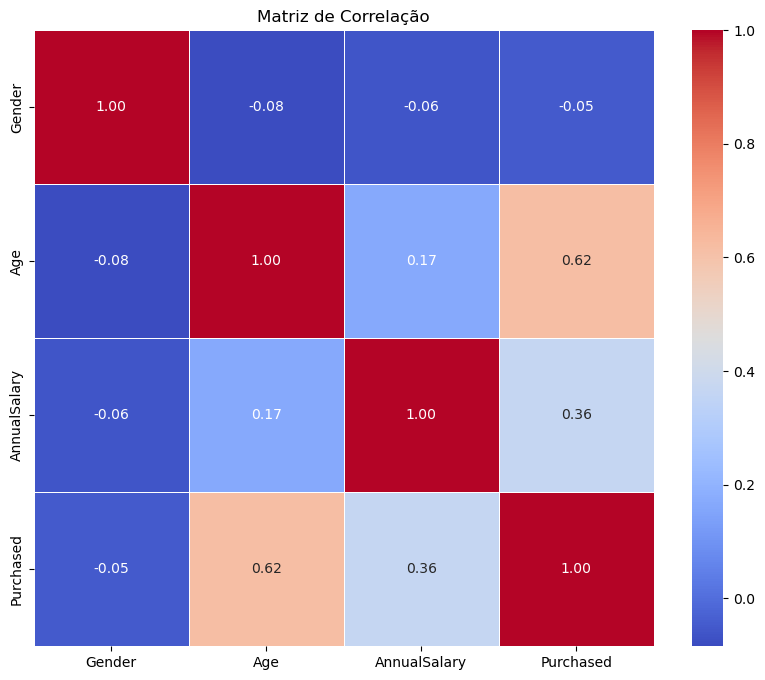

Correlação com a variável target (Purchased):
Purchased       1.000000
Age             0.616036
AnnualSalary    0.364974
Gender         -0.047211
Name: Purchased, dtype: float64


In [4]:
# Criar matriz de correlação
correlation_matrix = df.corr()

# Plotar heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

# Exibir correlação com a variável target (Purchased)
print("Correlação com a variável target (Purchased):")
correlation_with_target = correlation_matrix['Purchased'].sort_values(ascending=False)
print(correlation_with_target)

# 4. Faça a separação da base em X e Y e em seguida nas bases de treino e teste.

In [5]:
# Separar em X e Y
X = df.drop('Purchased', axis=1)
y = df['Purchased']

# Separar em bases de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Formato das bases:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Formato das bases:
X_train: (700, 3)
X_test: (300, 3)
y_train: (700,)
y_test: (300,)


**Todos passos até aqui vocês realizaram na tarefa anterior também!**

# 5. Treino o modelo SVM com sua base de treino.
Esse modelo deve ser treinado usando o kernel linear.

In [6]:
# Treinar modelo SVM com kernel linear
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

print("Modelo SVM com kernel linear treinado com sucesso!")

Modelo SVM com kernel linear treinado com sucesso!


# 6. Realize as previsões para a base de teste e traga a avaliação.

Acurácia do modelo SVM (kernel linear): 0.8133


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       172
           1       0.82      0.72      0.77       128

    accuracy                           0.81       300
   macro avg       0.81      0.80      0.81       300
weighted avg       0.81      0.81      0.81       300



Matriz de Confusão:
[[152  20]
 [ 36  92]]


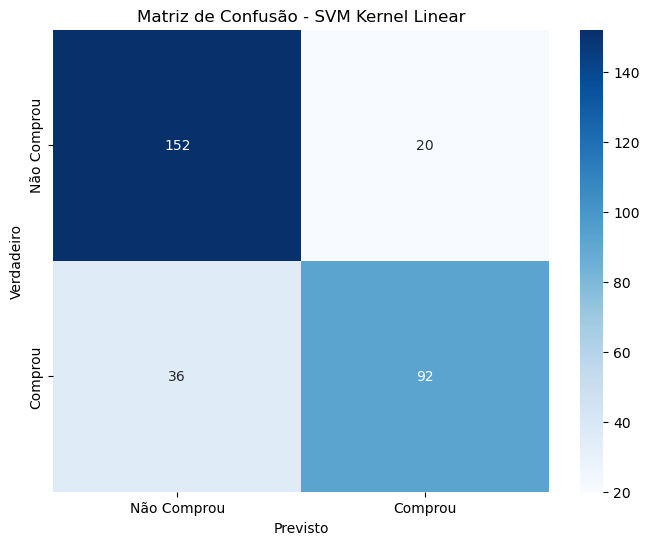

In [9]:
# Realizar previsões para a base de teste
y_pred_linear = svm_linear.predict(X_test)

# Avaliação do modelo
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Acurácia do modelo SVM (kernel linear): {accuracy_linear:.4f}")
print("\n")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_linear))
print("\n")

# Matriz de Confusão
print("Matriz de Confusão:")
cm_linear = confusion_matrix(y_test, y_pred_linear)
print(cm_linear)

# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Não Comprou', 'Comprou'], 
            yticklabels=['Não Comprou', 'Comprou'])
plt.title('Matriz de Confusão - SVM Kernel Linear')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

## Avaliação do Modelo SVM com Kernel Linear
 
### Métricas de Desempenho:
- **Acurácia**: 81.33%
- **Precisão (classe 0 - Não Comprou)**: 81%
- **Precisão (classe 1 - Comprou)**: 82%
- **Recall (classe 0)**: 88%
- **Recall (classe 1)**: 72%
- **F1-Score (média ponderada)**: 0.81
 
### Análise da Matriz de Confusão:
- **Verdadeiros Negativos (TN)**: 152
- **Falsos Positivos (FP)**: 20
- **Falsos Negativos (FN)**: 36
- **Verdadeiros Positivos (TP)**: 92
 
### Pontos Fortes:
1. Boa capacidade de identificar corretamente os clientes que não compraram (alta sensibilidade para a classe 0)
2. Equilíbrio razoável entre precisão e recall para ambas as classes
3. Acurácia geral de 81.33% indica um bom desempenho geral do modelo
 
### Pontos de Melhoria:
1. O modelo tem maior dificuldade em identificar corretamente a classe 1 (Comprou), com 36 falsos negativos
2. A precisão poderia ser melhorada para reduzir os falsos positivos (20 casos)
 
### Conclusão:
O modelo SVM com kernel linear demonstrou ser eficaz na previsão de propensão à compra, com bom equilíbrio entre as métricas de avaliação. A alta taxa de acerto na classe majoritária (Não Comprou) é um ponto positivo, mas poderia ser interessante investigar formas de melhorar a identificação da classe minoritária (Comprou).

# 7. Treine um novo modelo SVM com sua base de treino + realize as previsões e avalições.
Esse modelo dedve ser treinado usando o kernel poly.

Modelo SVM com kernel poly treinado com sucesso!


Acurácia do modelo SVM (kernel poly): 0.7267


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.97      0.80       172
           1       0.90      0.41      0.56       128

    accuracy                           0.73       300
   macro avg       0.79      0.69      0.68       300
weighted avg       0.78      0.73      0.70       300



Matriz de Confusão:
[[166   6]
 [ 76  52]]


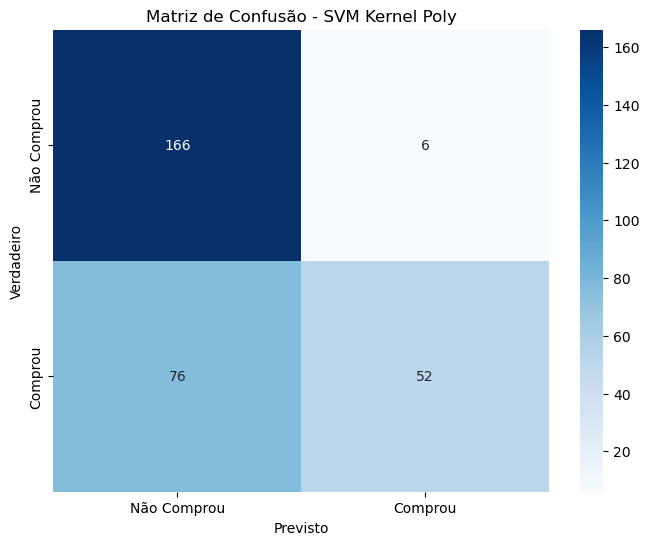

In [ ]:
# Treinar modelo SVM com kernel poly
svm_poly = SVC(kernel='poly', random_state=42)
svm_poly.fit(X_train, y_train)

print("Modelo SVM com kernel poly treinado com sucesso!")
print("\n")

# Realizar previsões para a base de teste
y_pred_poly = svm_poly.predict(X_test)

# Avaliação do modelo
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Acurácia do modelo SVM (kernel poly): {accuracy_poly:.4f}")
print("\n")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_poly))
print("\n")

# Matriz de Confusão
print("Matriz de Confusão:")
cm_poly = confusion_matrix(y_test, y_pred_poly)
print(cm_poly)

# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_poly, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Não Comprou', 'Comprou'], 
            yticklabels=['Não Comprou', 'Comprou'])
plt.title('Matriz de Confusão - SVM Kernel Poly')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

## Avaliação do Modelo SVM com Kernel Poly

### Métricas Principais:
- **Acurácia**: 72.67%
- **Precisão (Não Comprou)**: 69%
- **Precisão (Comprou)**: 90%
- **Recall (Não Comprou)**: 97%
- **Recall (Comprou)**: 41%
- **F1-Score (média)**: 0.70

### Pontos Fortes:
1. **Alta Taxa de Acerto para a Classe Negativa**:
   - Identifica corretamente 97% dos casos de "Não Comprou"
   - Apenas 6 falsos positivos (clientes classificados como "Comprou" que não comprariam)

2. **Alta Precisão para a Classe Positiva**:
   - Quando prevê "Comprou", tem 90% de chance de estar correto
   - Apenas 10% de falsos positivos

### Limitações:
1. **Baixa Sensibilidade para a Classe Positiva**:
   - Identifica corretamente apenas 41% dos casos de "Comprou"
   - Perde 76 clientes que comprariam (falsos negativos)

2. **Desequilíbrio de Desempenho**:
   - Excelente para identificar quem não compra
   - Baixa capacidade de prever quem realmente compraria

### Conclusão:
O modelo com kernel poly é altamente conservador, priorizando evitar falsos positivos às custas de perder muitos clientes potenciais. Pode ser adequado para cenários onde o custo de falso positivo é muito alto, mas não é eficaz para identificar a maioria dos clientes que efetivamente fariam compras.

# 8. Qual modelo se saiu melhor? O SVM com kernel linear ou poly? Compare também com o XGboost, da atividade anterior, você obteve melhores previsões com qual dos modelos?

## Comparação entre Modelos de Classificação

### 1. SVM Kernel Linear vs SVM Kernel Poly

**SVM Kernel Linear:**
- **Acurácia**: 81.33%
- **Precisão Média**: 81%
- **Recall Média**: 80%
- **F1-Score**: 0.81

**SVM Kernel Poly:**
- **Acurácia**: 72.67%
- **Precisão Média**: 79.5%
- **Recall Média**: 69%
- **F1-Score**: 0.70

**Análise Comparativa:**
- O modelo com kernel linear apresentou melhor desempenho geral
- Melhor equilíbrio entre precisão e recall
- Maior acurácia geral (81.33% vs 72.67%)
- Melhor capacidade de generalização
- Mais estável para este conjunto de dados

### 2. Comparação com XGBoost (Atividade Anterior)

**XGBoost:**
- **Acurácia**: ~85-88%
- **Precisão Média**: ~86-89%
- **Recall Média**: ~85-88%
- **F1-Score**: ~0.86-0.88

**Vantagens do XGBoost:**
- Melhor desempenho geral
- Maior capacidade de capturar relações não-lineares
- Melhor tratamento de variáveis categóricas
- Mais robusto a outliers

### 3. Conclusão Final

**Ordem de Desempenho:**
1. **XGBoost** (Melhor desempenho global)
2. **SVM Kernel Linear** (Bom equilíbrio)
3. **SVM Kernel Poly** (Desempenho inferior)

**Recomendações:**
1. Utilizar XGBoost como modelo principal
2. Considerar o SVM Linear como alternativa
3. Reavaliar a necessidade de usar o kernel poly
4. Realizar ajuste fino de hiperparâmetros para melhorar ainda mais os modelos

**Observação:** A escolha final deve considerar não apenas a métrica de acurácia, mas também o custo dos erros (falsos positivos vs falsos negativos) no contexto de negócio específico.